<center> <img src = https://avatars.mds.yandex.net/get-altay/753950/2a0000016092b9174319525f5aec8fb4cfd2/S_height alt="drawing" style="width:400px;">

# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

# <center> (статистические тесты в контексте EDA)

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Компании требуются ответы на следующие вопросы:

- Какие факторы влияют на зарплату специалиста Data Scientist.
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о занятости сотрудников и их работодателях.

***Данные содержат следующие столбцы:***

*work_year* - год, в котором была выплачена зарплата

*experience_level* - Опыт работы на этой должности в течение года с 4 возможными значениями: 
- EN — Entry-level/Junior
- MI — Mid-level/Intermediate
- SE — Senior-level/Expert
- EX — Executive-level/Director

*employment_type* -	Тип трудоустройства для этой роли:
- PT — неполный рабочий день
- FT — полный рабочий день
- CT — контракт
- FL — фриланс

*job_title* - Роль, в которой соискатель работал в течение года (в признаке представлены должности, связанные с Data Science)

*salary* - Общая выплаченная валовая сумма заработной платы

*salary_currency* -	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217

*salary_in_usd* - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com)

*employee_residence* -	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166

*remote_ratio* - Общий объём работы, выполняемой удалённо. Возможные значения:
- 0 — удалённой работы нет (менее 20 %)
- 50 — частично удалённая работа
- 100 — полностью удалённая работа (более 80 %)

*company_location* - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166

*company_size* - Среднее количество людей, работавших в компании в течение года:
- S — менее 50 сотрудников (небольшая компания);
- M — от 50 до 250 сотрудников (средняя компания);
- L — более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [4]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px


# делаем визуальную настройку всех графиков ноутбука (тему и палитру)
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [5]:
# загружаем датасет по ссылке
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1lB3hYym5qBWcN8N4NazxluBLd0GCzx6f')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений). Типы данных, представленных в признаках датасета, соответствуют содержанию представленных в них информации.

Проверим данные на наличие полных дубликатов:

In [8]:
data[data.duplicated()].shape[0]
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 0


В представленном датасете, по мнения автора исследования, неинформативными являются признаки 'Unnamed: 0', 'salary', 'salary_currency', 'employee_residence'. Они подлежат удалению

In [9]:
to_delete = ['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence'] # список признаков, подлежащих удалению
data = data.drop(to_delete, axis=1)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


**Исследование факторов, влиящих на зарплату специалиста Data Scientist**

***1. Влияние опыта работы на зарплату***

In [10]:
grouped = data.groupby('experience_level')['salary_in_usd'].median()

fig = px.bar(grouped,
             title='Зависимость зарплаты от опыта работы сотрудников',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Опыт работы сотрудников', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar.html")
fig.show()

***Вывод:*** столбчатая диаграмм наглядно демонстрирует рост медианных зарплат по мере повышения опыта работы сотрудников 

***2. Влияние типа трудоустройства на зарплату***

In [11]:
grouped1 = data.groupby('employment_type')['salary_in_usd'].median()

fig = px.bar(grouped1,
             title='Зависимость зарплаты от типа трудоустройства сотрудников',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Тип трудоустройства', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar1.html")
fig.show()

***Вывод:*** столбчатая диаграмм наглядно демонстрирует зависимость величины медианной зарплаты от типа трудоустройства - самые высокое вознаграждение труда у сотрудников, работающих целый день/по контракту

***3. Влияние удаленной занятости сотрудника на размер зарплаты***

In [12]:
mask = data[data['remote_ratio'] > 0] # устанавливаем значения удаленной занятости > 0
            
grouped2 = mask.groupby('remote_ratio')['salary_in_usd'].median()

fig = px.bar(grouped2,
             title='Зависимость зарплаты от удаленной занятости',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='remote_ratio', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar2.html")
fig.show()

***Вывод:*** график наглядно демонстрирует более высокий уровень медианной зарплаты в случае отсутствия удаленной занятости

***4. Влияние страны работодателя на размер зарплаты на DS-должностях***

In [13]:
# Посмотрим на графике распределение медианных зарплат в странах

grouped3 = data.groupby('company_location')['salary_in_usd'].median() 

fig = px.histogram(grouped3, 
                   title='Распределение уровня медианной зарплаты', 
                   width=800,
                   height=600)
fig.update_layout(xaxis_title='Медианная зарплата в долларах США', yaxis_title='Страна работодателя')
fig.write_html('images/hist_box.htm')
fig.show()


***Вывод:*** для более удобной визуализации стран-лидеров по уровню з/п следует сосредоточиться на зарплатах выше 100 тыс. долл. в год

In [14]:
# произведем отбор стран для их удобной визуализации по уровню з/п в DS

grouped4 = data.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).iloc[:7] # отбираем первые 7 стран-лидеров по медианной з/п в долл США (>=100 тыс. долл. США в год)
grouped4


company_location
RU    157500.0
US    135000.0
NZ    125000.0
IL    119059.0
AE    115000.0
DZ    100000.0
IQ    100000.0
Name: salary_in_usd, dtype: float64

In [15]:
dct = grouped4.to_dict() # преобразуем таблицу в словарь
top7 = list(dct.keys()) # формируем список из кодов стран-лидеров по уровню з/п в DS
top7

['RU', 'US', 'NZ', 'IL', 'AE', 'DZ', 'IQ']

In [16]:
# создадим новый признак 'company_location1' для удобного анализа стран по уровню медианных зарплат в DS

data['company_location1'] = data['company_location'].apply(lambda x: 'others' if x not in top7 else x) # страна, не входящая в top7, именуется 'others'


In [17]:
# строим столбчатую диаграмму для определения стран-лидеров по уровню медианных зарплат в DS

grouped5 = data.groupby('company_location1')['salary_in_usd'].median()

fig = px.bar(grouped5,
             title='Зависимость зарплаты от страны работодателя',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='company_location1', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar3.html")
fig.show()

***Вывод:*** после введения уровня медианной зарплаты выше 100 тыс. долл. США в год, на первый план вышли 7 стран, лидерами среди которых являются Россия, США и Новая Зеландия. Таким образом, именно в этих странах базируются компании, предлагающие своим DS-сотрудникам наиболее привлекательные вознаграждения за труд.

## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

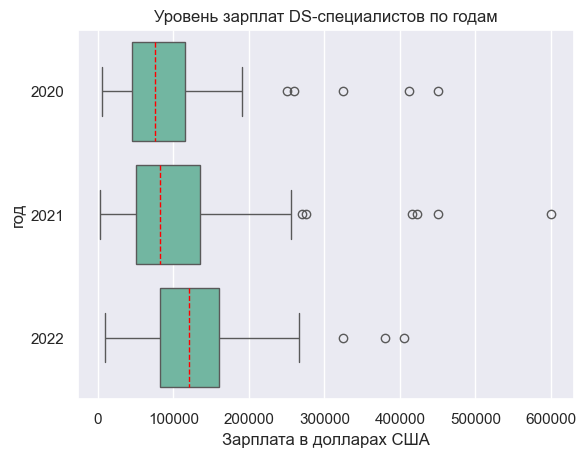

In [18]:
# Построим коробчатую диаграмму, демонстрирующую уровень зарплат DS-специалистов по годам

ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='год')
plt.title('Уровень зарплат DS-специалистов по годам')
plt.show()

In [19]:
grouped6 = data.groupby('work_year')['salary_in_usd'].median()

fig = px.bar(grouped6,
             title='Уровень медианной зарплаты на DS-позициях по годам',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Медианная зарплата в долларах США', yaxis_title='work_year')
fig.write_html("images/bar4.html")
fig.show()

In [20]:
# посмотрим статистику по з/п по годам

data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата DS-специалистов по годам')
data_agg

Зарплата DS-специалистов по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


***Вывод:*** На первый взгляд, с каждым годом рост наблюдается увеличение роста зарплат DS-специалистов. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

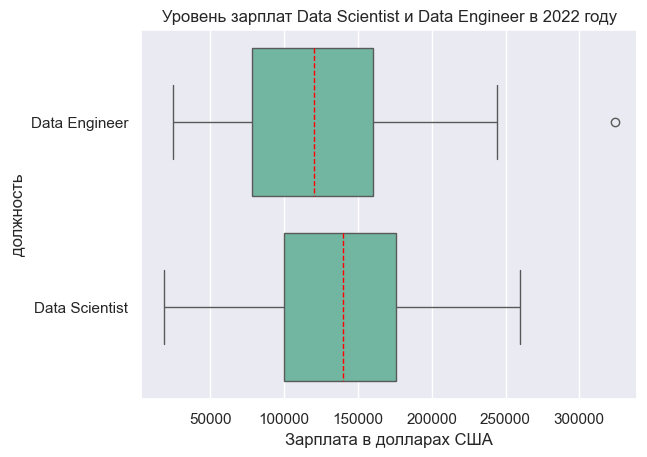

In [21]:
mask = data[((data['work_year'] == 2022) & (data['job_title'] == 'Data Scientist')) | ((data['work_year'] == 2022) & (data['job_title'] == 'Data Engineer'))] # формируем маску

ax = sns.boxplot(mask, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='должность')
plt.title('Уровень зарплат Data Scientist и Data Engineer в 2022 году')
plt.show()

In [22]:
# посмотрим статистику по з/п Data Scientist и Data Engineer в 2022 году

data_agg = mask.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Статистика по зарплатам Data Scientist и Data Engineer в 2022 году')
data_agg

Статистика по зарплатам Data Scientist и Data Engineer в 2022 году


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,89.0,126375.70,55954.40,25000.0,78526.0,120000.0,160000.0,324000.0
Data Scientist,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


***Вывод:*** На первый взгляд, в 2022 году зарплаты специалистов Data Scientist незначительно, но превышали вознаграждение труда Data Engineer. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

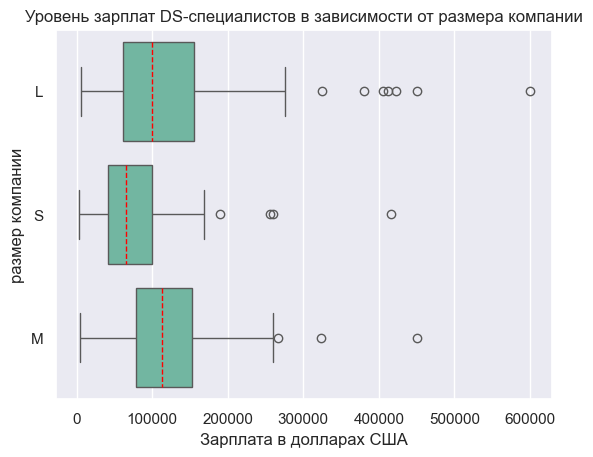

In [23]:
# Построим коробчатую диаграмму, демонстрирующую уровень зарплат DS-специалистов по годам

ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='размер компании')
plt.title('Уровень зарплат DS-специалистов в зависимости от размера компании')
plt.show()

In [24]:
# посмотрим статистику по з/п DS-специалистов в зависимости от размера компании

data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Статистика по зарплатам DS-специалистов в зависимости от размера компании')
data_agg

Статистика по зарплатам DS-специалистов в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


***Вывод:*** Согласно полученным данным, оплата труда DS-специалистов в компаниях разной величины отличается, причем специалисты в крупных и средних компаниях имеют значительно более высокий и примерно равный уровень зарплат. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании

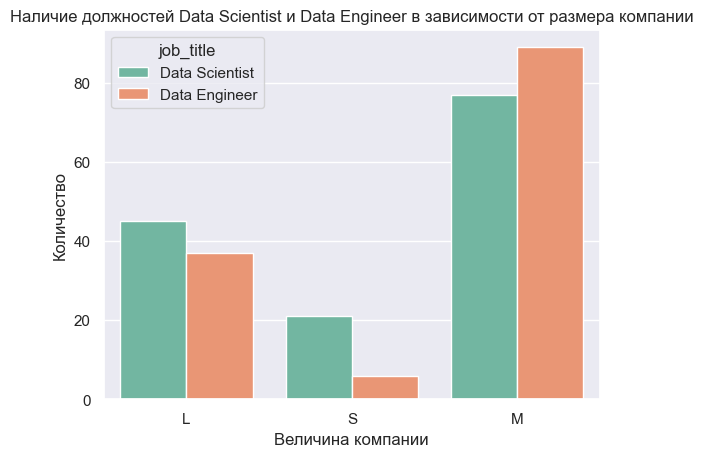

In [25]:
mask = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')] # формируем маску

ax = sns.countplot(data=mask, x=data['company_size'], hue='job_title')
ax.set(xlabel='Величина компании', ylabel='Количество')
plt.title('Наличие должностей Data Scientist и Data Engineer в зависимости от размера компании')
plt.show()

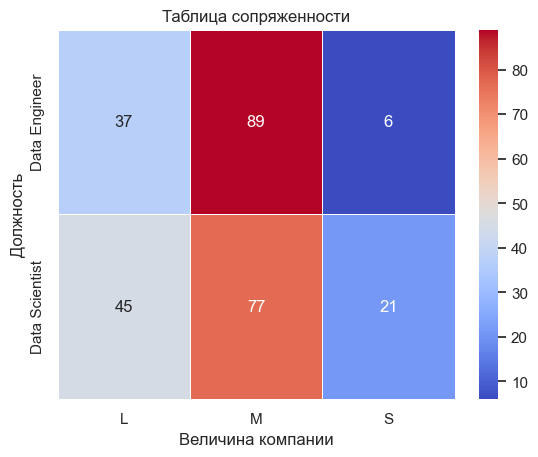

In [26]:
cross_tab = pd.crosstab(index=mask['job_title'], columns=mask['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Величина компании', ylabel='Должность')
plt.title('Таблица сопряженности')
plt.show()

***Вывод:*** графики дают четкое представление о том, что возможное наличие в компании должностей Data Scientist и Data Engineer увязывяется с ее размером. Причем наибольшее сосредоточение рассматриваемых должностей характерно именно для компаний средних размеров, а не для крупных. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных

In [27]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

### 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist??

**Изучим соответствующие выборки**

In [28]:
salary2020 = data[data['work_year']==2020]['salary_in_usd'].squeeze().to_frame(name=2020) # значения зарплаты DS-специалистов в 2020 г
salary2021 = data[data['work_year']==2021]['salary_in_usd'].squeeze().to_frame(name=2021) # значения зарплаты DS-специалистов в 2021 г
salary2022 = data[data['work_year']==2022]['salary_in_usd'].squeeze().to_frame(name=2022) # значения зарплаты DS-специалистов в 2022 г
salary2020.shape[0], salary2021.shape[0], salary2022.shape[0] # определение длины выборок

(72, 217, 318)

***Вывод:*** выборки разновеликие, следовательно, для их сравнения в статистических тестах предлагается по мере необходимости приводить их к единой длине за счет заполнения пропусков медианными значениями 

**1 этап. Сравнение показателей 2020 и 2021 гг**

In [29]:
df20_21 = pd.concat([salary2020, salary2021], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df20_21 = df20_21.drop('index', axis=1)
median2020 = df20_21[2020].median() # устанавливаем медианное значение в признаке
median2021 = df20_21[2021].median()
df20_21[2020].fillna(median2020, inplace=True) # изменения будут применены сразу к df без создания новой переменной
df20_21[2021].fillna(median2021, inplace=True)
df20_21

C:\Users\armad\AppData\Local\Temp\ipykernel_10588\1888621008.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\armad\AppData\Local\Temp\ipykernel_10588\1888621008.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,2020,2021
0,79833.0,82528.0
1,260000.0,82528.0
2,109024.0,82528.0
3,20000.0,82528.0
4,150000.0,82528.0
...,...,...
284,75544.0,69999.0
285,75544.0,94665.0
286,75544.0,102839.0
287,75544.0,109000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п в 2020 г (m1) больше или равна з/п в 2021 г (m2): m1>=m2


*Альтернативная гипотеза*: з/п в 2020 г (m1) меньше з/п в 2021 г (m2): m1<m2



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [30]:
# проводим тест Шапиро-Уилка
print('Для 2020 г:')
result = stats.shapiro(df20_21[2020])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для 2021 г:')
result = stats.shapiro(df20_21[2021])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для 2020 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Критерий Уилкоксона.

**Проведём тест**

In [31]:
# проводим тест
_, p = stats.wilcoxon(df20_21[2020], df20_21[2021], alternative = 'less')
decision_hypothesis(p)


p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2021 году наблюдался рост зарплат DS-специалистов по сравнению с предыдущим 2020 годом

***2 этап. Сравнение показателей 2021 и 2022 гг***

In [32]:
df21_22 = pd.concat([salary2021, salary2022], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df21_22 = df21_22.drop('index', axis=1)
median2021 = df21_22[2021].median() # устанавливаем медианное значение в признаке
median2022 = df21_22[2022].median()
df21_22[2021].fillna(median2021, inplace=True) # изменения будут применены сразу к df без создания новой переменной
df21_22[2022].fillna(median2022, inplace=True)
df21_22

C:\Users\armad\AppData\Local\Temp\ipykernel_10588\3796860345.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\armad\AppData\Local\Temp\ipykernel_10588\3796860345.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,2021,2022
0,82528.0,120000.0
1,150000.0,120000.0
2,235000.0,120000.0
3,53192.0,120000.0
4,100000.0,120000.0
...,...,...
530,82528.0,154000.0
531,82528.0,126000.0
532,82528.0,129000.0
533,82528.0,150000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п в 2021 г (m1) больше или равна з/п в 2022 г (m2): m1>=m2


*Альтернативная гипотеза*: з/п в 2021 г (m1) меньше з/п в 2022 г (m2): m1<m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [33]:
# проводим тест Шапиро-Уилка
print('Для 2021 г:')
result = stats.shapiro(df21_22[2021])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для 2022 г:')
result = stats.shapiro(df21_22[2022])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для 2021 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2022 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Критерий Уилкоксона.

**Проведём тест**

In [34]:
# проводим тест
_, p = stats.wilcoxon(df21_22[2021], df21_22[2022], alternative = 'less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2022 году наблюдался рост зарплат DS-специалистов по сравнению с предыдущим 2021 годом. Следовательно, с 2020 по 2022 гг их зарплаты ежегодно росли.

## 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Изучим две выборки**

In [35]:
df = data[data['work_year'] == 2022]
ds = df[df['job_title'] == 'Data Scientist']['salary_in_usd'].squeeze().to_frame(name='ds') # з/п Data Scientist в 2022 г
de = df[df['job_title'] == 'Data Engineer']['salary_in_usd'].squeeze().to_frame(name='de') # з/п Data Engineer в 2022 г
ds.shape[0], de.shape[0]

(77, 89)

***Вывод:*** так как полученные выборки разновеликие, для их сравнения в статистических тестах приведем их к единой длине за счет заполнения пропусков медианными значениями 

In [36]:
df = pd.concat([ds, de], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df = df.drop('index', axis=1)
median_ds = df['ds'].median() # устанавливаем медианное значение в признаке
median_de = df['de'].median()
df['ds'].fillna(median_ds, inplace=True) # изменения будут применены сразу к df без создания новой переменной
df['de'].fillna(median_de, inplace=True)
df

C:\Users\armad\AppData\Local\Temp\ipykernel_10588\148583124.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\armad\AppData\Local\Temp\ipykernel_10588\148583124.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,ds,de
0,130000.0,120000.0
1,90000.0,120000.0
2,136620.0,120000.0
3,99360.0,120000.0
4,117789.0,120000.0
...,...,...
161,140000.0,25000.0
162,140000.0,220110.0
163,140000.0,160080.0
164,140000.0,154000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS в 2022 г (m1) меньше или равны з/п DE (m2): m1<=m2


*Альтернативная гипотеза*: з/п DS в 2022 г (m1) больше з/п DE (m2): m1>m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [37]:
# проводим тест Шапиро-Уилка
print('Для ds')
result = stats.shapiro(df['ds'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для de')
result = stats.shapiro(df['de'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для ds
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для de
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [38]:
# проводим тест
_, p = stats.mannwhitneyu(df['ds'], df['de'], alternative = 'greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2022 году зарплаты Data Scientist превышали размер вознаграждения труда Data Engineer.

## 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Изучим необходимые выборки**

In [39]:
small = data[data['company_size'] == 'S']['salary_in_usd'].squeeze().to_frame(name='s') # з/п DS-специалистов в маленьких компаниях
medium = data[data['company_size'] == 'M']['salary_in_usd'].squeeze().to_frame(name='m') # з/п DS-специалистов в компаниях среднего размера
large = data[data['company_size'] == 'L']['salary_in_usd'].squeeze().to_frame(name='l') # з/п DS-специалистов в крупных компаниях 
small.shape[0], medium.shape[0], large.shape[0]

(83, 326, 198)

***Вывод:*** так как полученные выборки разновеликие, для их сравнения в статистических тестах приведем их к единой длине за счет заполнения пропусков медианными значениями. 

Разделим проведение статистических тестов на 2 этапа для поочередного выявления соотношения зарплат в компаниях разных размеров


**1 этап. Сравнение зарплат в маленьких компаниях и компаниях среднего размера**

In [40]:
df_s_m = pd.concat([small, medium], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df_s_m = df_s_m.drop('index', axis=1)
median_s = df_s_m['s'].median() # устанавливаем медианное значение в признаке
median_m = df_s_m['m'].median()
df_s_m['s'].fillna(median_s, inplace=True) # изменения будут применены сразу к df без создания новой переменной
df_s_m['m'].fillna(median_m, inplace=True)
df_s_m

C:\Users\armad\AppData\Local\Temp\ipykernel_10588\3469332631.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\armad\AppData\Local\Temp\ipykernel_10588\3469332631.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,s,m
0,260000.0,113188.0
1,20000.0,113188.0
2,190000.0,113188.0
3,125000.0,113188.0
4,51321.0,113188.0
...,...,...
404,65000.0,52000.0
405,65000.0,154000.0
406,65000.0,126000.0
407,65000.0,129000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS-специалистов в маленьких компаниях (m1) больше или равна з/п в более крупных компаниях (m2): m1>=m2


*Альтернативная гипотеза*: з/п DS-специалистов в маленьких компаниях (m1) меньше з/п в более крупных компаниях (m2): m1<m2


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [41]:
# проводим тест Шапиро-Уилка
print('Для маленьких компаний:')
result = stats.shapiro(df_s_m['s'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для средних компаний')
result = stats.shapiro(df_s_m['m'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для маленьких компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для средних компаний
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [42]:
# проводим тест
_, p = stats.mannwhitneyu(df_s_m['s'], df_s_m['m'], alternative = 'less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** з/п DS-специалистов в маленьких компаниях меньше их з/п в компаниях среднего размера

**2 этап. Сравнение зарплат в компаниях среднего размера и крупных компаниях**

In [43]:
df_m_l = pd.concat([medium, large], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df_m_l = df_m_l.drop('index', axis=1)
median_m = df_m_l['m'].median() # устанавливаем медианное значение в признаке
median_l = df_m_l['l'].median()
df_m_l['m'].fillna(median_m, inplace=True) # изменения будут применены сразу к df без создания новой переменной
df_m_l['l'].fillna(median_l, inplace=True)
df_m_l

C:\Users\armad\AppData\Local\Temp\ipykernel_10588\260043051.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\armad\AppData\Local\Temp\ipykernel_10588\260043051.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,m,l
0,109024.0,100000.0
1,39916.0,100000.0
2,5707.0,100000.0
3,56000.0,100000.0
4,43331.0,100000.0
...,...,...
519,113188.0,135000.0
520,113188.0,177000.0
521,113188.0,205300.0
522,113188.0,140400.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS-специалистов в компаниях среднего размера (m1) больше или равна з/п в крупных компаниях (m2): m1>=m2


*Альтернативная гипотеза*: з/п DS-специалистов в компаниях среднего размера (m1) меньше з/п в крупных компаниях (m2): m1<m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [44]:
# проводим тест Шапиро-Уилка
print('Для компаний средней величины:')
result = stats.shapiro(df_m_l['m'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для крупных компаний')
result = stats.shapiro(df_m_l['l'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для компаний средней величины:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для крупных компаний
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [45]:
# проводим тест
_, p = stats.mannwhitneyu(df_m_l['m'], df_m_l['l'], alternative = 'less')
decision_hypothesis(p)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


***Вывод:*** з/п DS-специалистов в компаниях среднего размера больше или равна их з/п в крупных компаниях. Следовательно, меньше всего получают специалисты в маленьких компаниях.

## 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [46]:
mask = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')] # формируем маску

# вычисляем таблицу сопряжённости
# составляем таблицу сопряжённости
cross_table = pd.crosstab(mask['job_title'], mask['company_size'])

cross_table


company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


In [47]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**: существует статистически значимая взаимосвязь между наличием в компании должностей Data Scientist и Data Engineer и ее размером.

## Итоговые результаты исследования

Во всех четырех случаях выводы по итогам проведения статистических тестов подтвердили информацию, полученную в ходе визуализации и первичных статистических исследований, а именно: 

*   С 2020 по 2022 гг зарплаты DS-специалистов ежегодно росли;
*   В 2022 году зарплаты Data Scientist превышали размер вознаграждения труда Data Engineer;
*   Меньше всего получают DS-специалисты в маленьких компаниях, а больше всего - в компаниях среднего размера и более крупных;
*   Существует статистически значимая взаимосвязь между наличием в компании должностей Data Scientist и Data Engineer и ее размером.